In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import cvxpy as cp

In [3]:
# data generation
rng = np.random.default_rng(5)
n = 10
radius = rng.uniform(1.0, 3.0, n)

In [4]:
# build and solve optimization problem
centers = cp.Variable((2, n), name='c')
constraints = []
for i in range(n - 1):
    for j in range(i + 1, n):
        constraints += [cp.sum(cp.square(centers[:, i] - centers[:, j])) >=
                         (radius[i] + radius[j]) ** 2]

# initialize centers to random locations
centers.value = rng.uniform(-5.0, 5.0, (2, n))

obj = cp.Minimize(cp.max(cp.norm_inf(centers, axis=0) + radius))
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none',
              least_square_init_duals='no')

(CVXPY) Nov 09 01:43:25 PM: Your problem has 20 variables, 45 constraints, and 0 parameters.
(CVXPY) Nov 09 01:43:25 PM: It is compliant with the following grammars: 
(CVXPY) Nov 09 01:43:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 09 01:43:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 09 01:43:25 PM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      270
Number of nonzeros in inequality constraint Jacobian.:      190
Number of nonzeros in Lagrangian Hessian.............:       90

Total number of variables............................:      121
                     variables with only lower bound

6.457115141386893

(w/o function evaluations)   =      0.126
Total CPU secs in NLP function evaluations           =      8.770

EXIT: Optimal Solution Found.


Circle packing (ratio=0.740)


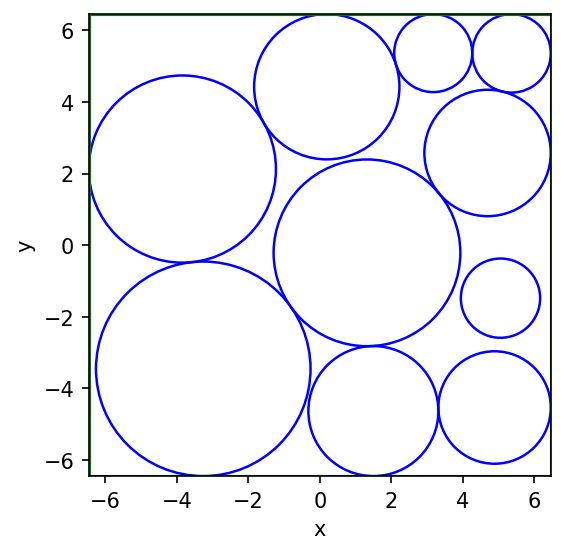

In [9]:
# plot circles
L = prob.value 

square_size = float(L) * 2
pi = np.pi
ratio = pi * np.sum(np.square(radius)) / (square_size**2)

# create plot to visualize the packing
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect("equal", adjustable="box")
fig.set_dpi(150)

# draw circles
for i in range(n):
    x_val = centers.value[0, i]
    y_val = centers.value[1, i]
    if x_val is None or y_val is None:
        msg = f"Circle center value not assigned for index {i}."
        raise ValueError(msg)
    circle = Circle(
        (float(x_val), float(y_val)),  # (x, y) center
        radius[i],  # radius
        fill=False,  # outline only
        ec="b",
        lw=1.2,  # edge color/width
    )
    ax.add_patch(circle)

# draw square border
border = Rectangle(
    (-square_size / 2, -square_size / 2),  # bottom-left
    square_size,
    square_size,  # width, height
    fill=False,
    ec="g",
    lw=1.5,
)
ax.add_patch(border)

# limits and cosmetics
ax.set_xlim(float(-square_size / 2), float(square_size / 2))
ax.set_ylim(float(-square_size / 2), float(square_size / 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_title(f"Circle packing (ratio={ratio:.3f})")
print(f"Circle packing (ratio={ratio:.3f})")
plt.show()